In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "PHJ"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/baseline

Average verified rate: 0.9485069283287639

Average of error rates: 0.06036458564763386

Total token count: 2897885



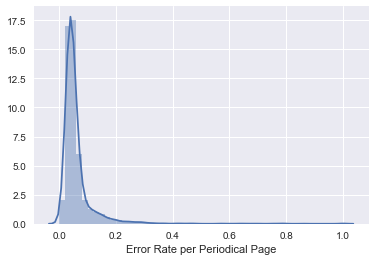

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 200 )

[('-', 3311),
 ('m', 2671),
 ('d', 2283),
 ('¥', 2135),
 ("'", 1992),
 ('ñ', 1991),
 ('tion', 1419),
 ('con-', 1357),
 ('in-', 1275),
 ('e', 1273),
 ('re-', 1243),
 ('r', 1143),
 ('w', 1134),
 ('co', 1092),
 ('t', 1026),
 ('n', 969),
 (')', 878),
 ('be-', 795),
 ('ex-', 740),
 ('g', 726),
 ('f', 721),
 ('de-', 691),
 ('com-', 656),
 ('ment', 649),
 ('dis-', 642),
 ('lb', 585),
 ('pro-', 507),
 ('x', 490),
 ('im-', 452),
 ('per-', 408),
 ('un-', 407),
 ('(', 404),
 ('tions', 379),
 ('pre-', 347),
 ('ful', 334),
 ('sub-', 329),
 ('ad-', 328),
 ('ñthe', 326),
 ('en-', 307),
 ('ments', 272),
 ('al-', 257),
 ('th', 255),
 ('*', 250),
 ('ap-', 249),
 ('ac-', 248),
 ('/', 238),
 ('oo', 229),
 ('ñselected', 228),
 ('ñsel', 227),
 ('ous', 225),
 ('mo', 225),
 ('pp', 223),
 ('sup-', 209),
 ('%', 207),
 ('to-', 201)]

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)

[('¥', 2135),
 ('ñ', 1991),
 (')', 878),
 ('(', 404),
 ('ñthe', 326),
 ('*', 250),
 ('/', 238),
 ('ñselected', 228),
 ('ñsel', 227),
 ('%', 207),
 ('_', 180),
 ('+', 172),
 ('ñthis', 168),
 ('¡', 158),
 ('ñthese', 155),
 (']', 154),
 ('•', 146),
 ('ña', 143),
 ("(misses')", 139),
 ("(ladies')", 124),
 ('ã', 123),
 ('\\', 111),
 ('¥¥', 102),
 ('=', 92),
 ('ñall', 92),
 ('ñby', 89),
 ('ñdr', 85),
 ('ñmrs', 82),
 ("(children's)", 81),
 ('societyñmrs', 80),
 ('societyñl', 78),
 ('(to', 74),
 ('ñone', 66),
 ('ô', 65),
 ('ñcomposed', 65),
 ('(the', 63),
 ('ñtake', 62),
 ('ñand', 55),
 ('ñmedical', 54),
 ('ñmr', 51),
 ('(and', 51),
 ('ñto', 51),
 ('(in', 48),
 ('ñex', 48),
 ('ñit', 47),
 ('ñin', 45),
 ('ñwe', 45),
 ('ñgood', 43),
 ('ñtwo', 41),
 ('ñan', 40),
 ('`', 39),
 ('ñnew', 39),
 ('ñboston', 39),
 ('(especially', 38),
 ('bandage)', 37),
 ('large)', 37),
 ('(monthly', 37),
 ('societyña', 37),
 ('(elastic)', 37),
 ('(which', 36),
 ('(continued', 36),
 ('(extra', 36),
 ('%x', 35),
 ('ñchri

## Correction 1 -- Normalize Special Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction1

Average verified rate: 0.9563835150945872

Average of error rates: 0.05139457898244834

Total token count: 2895740



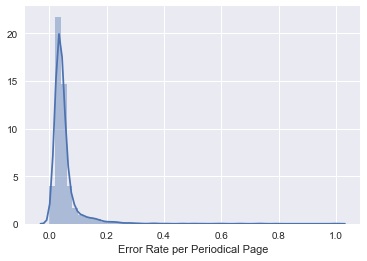

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 3495),
 ('m', 2732),
 ('d', 2320),
 ("'", 2130),
 ('tion', 1424),
 ('e', 1371),
 ('con-', 1360),
 ('in-', 1275),
 ('re-', 1243),
 ('r', 1238),
 ('w', 1166),
 ('t', 1148),
 ('n', 1104),
 ('co', 1103),
 ('be-', 798),
 ('f', 775),
 ('g', 754),
 ('ex-', 744),
 ('de-', 692),
 ('com-', 658),
 ('ment', 652),
 ('dis-', 642),
 ('x', 639),
 ('lb', 585),
 ('pro-', 509),
 ('im-', 452),
 ('per-', 412),
 ('un-', 408),
 ('tions', 380),
 ('pre-', 347),
 ('ful', 334),
 ('ad-', 330),
 ('sub-', 329),
 ('en-', 308),
 ('ments', 272),
 ('th', 260),
 ('sel', 259),
 ('al-', 257),
 ('ap-', 250),
 ('ac-', 248),
 ('oo', 235),
 ('pp', 228),
 ('mo', 227),
 ('ous', 225),
 ('k', 210),
 ('sup-', 209),
 ('z', 206),
 ('to-', 201),
 ('u', 196),
 ('treat-', 196)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction2

Average verified rate: 0.9782014724508072

Average of error rates: 0.030641413019329045

Total token count: 2851844



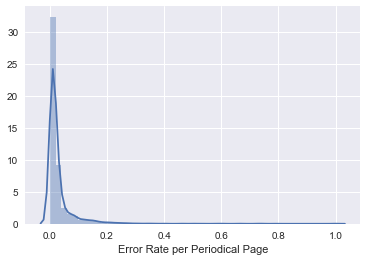

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 3480),
 ('m', 2730),
 ('d', 2320),
 ("'", 2130),
 ('e', 1370),
 ('r', 1235),
 ('w', 1166),
 ('t', 1146),
 ('n', 1104),
 ('co', 1101),
 ('f', 775),
 ('g', 753),
 ('x', 639),
 ('lb', 585),
 ('th', 260),
 ('sel', 251),
 ('oo', 235),
 ('pp', 228),
 ('mo', 227),
 ('k', 210),
 ('z', 206),
 ('u', 196),
 ("an'", 192),
 ('--', 189),
 ('-page', 133),
 ('q', 132),
 ('ournal', 103),
 ('society-', 100),
 ('al', 100),
 ("'tis", 87),
 ('te', 86),
 ('pa', 83),
 ('ex', 82),
 ('ro', 82),
 ('oz', 81),
 ("'the", 80),
 ('ga', 77),
 ('munn', 73),
 ('va', 73),
 ('io', 72),
 ('ti', 70),
 ("''", 66),
 ('tion', 63),
 ("infants'", 61),
 ('---', 60),
 ('id', 59),
 ('zo', 55),
 ('viperance', 54),
 ('si', 48),
 ('urnal', 48)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18850601-V01-01-page1.txt: [('-MONTHLY', 'MONTHLY'), ('-', ''), ('TEMPER-', 'TEMPER')]
PHJ18850601-V01-01-page10.txt: [('Temperqee-', 'Temperqee')]
PHJ18850601-V01-01-page12.txt: [('-suppression', 'suppression')]
PHJ18850601-V01-01-page13.txt: [('-', ''), ('"--', '"-')]
PHJ18850601-V01-01-page15.txt: [('Tar-', 'Tar')]
PHJ18850601-V01-01-page16.txt: [('dis-', 'dis')]
PHJ18850601-V01-01-page17.txt: [('-ed', 'ed'), ('Lam-', 'Lam')]
PHJ18850601-V01-01-page19.txt: [('--', '-')]
PHJ18850601-V01-01-page2.txt: [('-wage', 'wage')]
PHJ18850601-V01-01-page21.txt: [('symp-', 'symp')]
PHJ18850601-V01-01-page23.txt: [('-a-', 'a-'), ('-s...se', 's...se'), ('-.', '.'), ('-...-', '...-'), ('----a', '---a'), ('-', ''), ('--', '-'), ('---', '--'), ('-', ''), ('-', ''), ('OTHER-', 'OTHER'), ('-', ''), ('-', '')]
PHJ18850601-V01-01-page24.txt: [('.-', '.'), ('-', ''), ('----', '---'), ('CAL.--', 'CAL.-')]
PHJ18850601-V01-01-page3.txt: [('care-', 'care')]
PHJ18850601-V01-01-page7.txt: [('-', '')]
PHJ1885

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction3

Average verified rate: 0.9803429572874915

Average of error rates: 0.027733170406576316

Total token count: 2850734



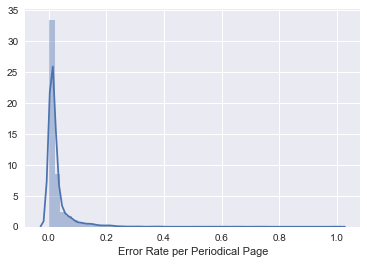

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2734),
 ('d', 2327),
 ("'", 2191),
 ('e', 1391),
 ('r', 1266),
 ('t', 1202),
 ('w', 1175),
 ('n', 1117),
 ('co', 1105),
 ('f', 794),
 ('g', 766),
 ('x', 647),
 ('lb', 588),
 ('th', 260),
 ('sel', 251),
 ('oo', 236),
 ('mo', 233),
 ('pp', 228),
 ('k', 216),
 ('z', 214),
 ('u', 199),
 ("an'", 192),
 ('q', 133),
 ('ex', 111),
 ('al', 107),
 ('ournal', 105),
 ('pa', 88),
 ("'tis", 87),
 ('te', 86),
 ('ro', 85),
 ('oz', 81),
 ('ga', 81),
 ("'the", 80),
 ('va', 73),
 ('munn', 73),
 ('ti', 73),
 ('io', 72),
 ("''", 68),
 ('-', 65),
 ('tion', 63),
 ("infants'", 61),
 ('id', 59),
 ('re', 58),
 ('zo', 55),
 ('viperance', 54),
 ('yo', 48),
 ('si', 48),
 ('urnal', 48),
 ("'em", 48),
 ('fahr', 46)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18850601-V01-01-page12.txt: [("'Blessed", 'Blessed')]
PHJ18850601-V01-01-page16.txt: [("'graham", 'graham')]
PHJ18850601-V01-01-page17.txt: [("'should", 'should')]
PHJ18850601-V01-01-page24.txt: [("'natural", 'natural'), ("'A", 'A'), ("'VP", 'VP')]
PHJ18850601-V01-01-page7.txt: [("'Tis", 'Tis'), ("'Twill", 'Twill'), ("'Tis", 'Tis')]
PHJ18850601-V01-01-page8.txt: [("'Now", 'Now')]
PHJ18850801-V01-02-page16.txt: [("'But", 'But')]
PHJ18850801-V01-02-page5.txt: [("'of", 'of')]
PHJ18850801-V01-02-page7.txt: [("'not", 'not')]
PHJ18851001-V01-03-page11.txt: [("'fortunately", 'fortunately')]
PHJ18851001-V01-03-page12.txt: [("'Taper", 'Taper'), ("'taper", 'taper'), ("'a", 'a')]
PHJ18851001-V01-03-page13.txt: [("'Sometimes", 'Sometimes'), ("'A", 'A')]
PHJ18851001-V01-03-page18.txt: [("'What", 'What')]
PHJ18851001-V01-03-page19.txt: [("'healthy", 'healthy')]
PHJ18851001-V01-03-page20.txt: [("'heroine", 'heroine')]
PHJ18851001-V01-03-page21.txt: [("'sure", 'sure')]
PHJ18851001-V01-03-page22.txt

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction4

Average verified rate: 0.9808491067757629

Average of error rates: 0.02707709397911575

Total token count: 2850572



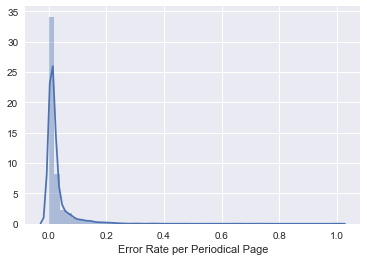

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2736),
 ('d', 2336),
 ("'", 1997),
 ('e', 1399),
 ('r', 1279),
 ('t', 1213),
 ('w', 1176),
 ('n', 1124),
 ('co', 1118),
 ('f', 796),
 ('g', 766),
 ('x', 649),
 ('lb', 588),
 ('th', 260),
 ('sel', 251),
 ('oo', 237),
 ('mo', 233),
 ('pp', 228),
 ('z', 217),
 ('k', 216),
 ('u', 199),
 ("an'", 192),
 ('q', 133),
 ('ex', 111),
 ('al', 109),
 ('ournal', 106),
 ('pa', 88),
 ('te', 86),
 ('ro', 86),
 ('oz', 81),
 ('ga', 81),
 ('va', 74),
 ('munn', 73),
 ('ti', 73),
 ('io', 72),
 ('-', 66),
 ('tion', 63),
 ("infants'", 61),
 ('id', 59),
 ('re', 58),
 ('zo', 55),
 ('em', 55),
 ('viperance', 54),
 ("''", 49),
 ('si', 48),
 ('urnal', 48),
 ('yo', 48),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18850601-V01-01-page2.txt: [('It', 'It')]
PHJ18861001-V02-03-page1.txt: [('So', 'So')]
PHJ18870401-V02-06-page1.txt: [('Iv', 'Iv')]
PHJ18870601-V02-07-page13.txt: [('At', 'At')]
PHJ18890401-V04-04-page28.txt: [('Of', 'Of')]
PHJ18890501-V04-05-page14.txt: [(' w o nd e r ', 'wonder')]
PHJ18890501-V04-05-page29.txt: [('If', 'If'), ('Of', 'Of')]
PHJ18891001-V04-10-page29.txt: [('It', 'It')]
PHJ18891201-V04-12-page34.txt: [('To', 'To')]
PHJ18900301-V05-03-page30.txt: [('So', 'So')]
PHJ18900501-V05-05-page31.txt: [('In', 'In')]
PHJ18900801-V05-08-page29.txt: [('So', 'So')]
PHJ18901001-V05-10-page31.txt: [('St', 'St')]
PHJ18901201-V05-12-page28.txt: [('It', 'It')]
PHJ18901201-V05-12-page29.txt: [('Go', 'Go')]
PHJ18910101-V06-01-page28.txt: [('Do', 'Do')]
PHJ18920401-V07-04-page30.txt: [('No', 'No')]
PHJ18920501-V07-05-page28.txt: [('Is', 'Is')]
PHJ19020201-V17-02-page2.txt: [('It', 'It')]
PHJ19020301-V17-03-page24.txt: [('He', 'He')]
PHJ19020601-V17-06-page35.txt: [('Is', 'Is')]
PHJ1902080

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction5

Average verified rate: 0.9808463809521136

Average of error rates: 0.027078649189069097

Total token count: 2850584



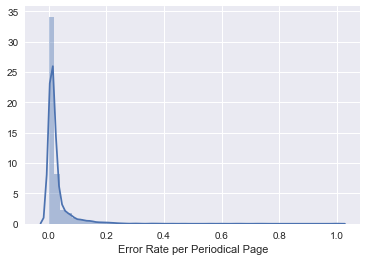

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2736),
 ('d', 2336),
 ("'", 1997),
 ('e', 1398),
 ('r', 1278),
 ('t', 1213),
 ('w', 1175),
 ('n', 1124),
 ('co', 1118),
 ('f', 796),
 ('g', 766),
 ('x', 649),
 ('lb', 588),
 ('th', 260),
 ('sel', 251),
 ('oo', 237),
 ('mo', 233),
 ('pp', 228),
 ('z', 217),
 ('k', 216),
 ('u', 199),
 ("an'", 192),
 ('q', 133),
 ('ex', 111),
 ('al', 109),
 ('ournal', 106),
 ('pa', 88),
 ('te', 86),
 ('ro', 86),
 ('oz', 81),
 ('ga', 81),
 ('va', 74),
 ('munn', 73),
 ('ti', 73),
 ('io', 72),
 ('-', 66),
 ('tion', 63),
 ("infants'", 61),
 ('id', 59),
 ('re', 58),
 ('zo', 55),
 ('em', 55),
 ('viperance', 54),
 ("''", 49),
 ('si', 48),
 ('urnal', 48),
 ('yo', 48),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18850601-V01-01-page23.txt: [('re', 's')]
PHJ18850601-V01-01-page3.txt: [('th', 'ese'), ('co', 'exist')]
PHJ18850801-V01-02-page22.txt: [('pp', 'r')]
PHJ18850801-V01-02-page23.txt: [('ri', 'le')]
PHJ18851001-V01-03-page22.txt: [('PP', 'r')]
PHJ18851201-V01-04-page16.txt: [('devel', 'oped')]
PHJ18851201-V01-04-page18.txt: [('wiv', 'e')]
PHJ18851201-V01-04-page5.txt: [('FO', 'UL')]
PHJ18851201-V01-04-page6.txt: [('accommo', 'dating')]
PHJ18851201-V01-04-page8.txt: [('phy', 'sician')]
PHJ18860201-V01-05-page23.txt: [('PRESERVA', 'TION')]
PHJ18860201-V01-05-page3.txt: [('dif', 'ficult')]
PHJ18860401-V01-06-page22.txt: [('PREVEN', 'TION')]
PHJ18860601-V02-01-page19.txt: [('striv', 'ing')]
PHJ18860601-V02-01-page21.txt: [('shoul', 'ders'), ('ri', 'ce')]
PHJ18860601-V02-01-page22.txt: [('TEMPERANC', 'E')]
PHJ18860601-V02-01-page3.txt: [('alime', 'ntation')]
PHJ18860801-V02-02-page1.txt: [('ti', 'e')]
PHJ18860801-V02-02-page24.txt: [('fo', 'r')]
PHJ18860801-V02-02-page26.txt: [('BI', 'MONTH

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction6

Average verified rate: 0.9811191527390404

Average of error rates: 0.026716285269940018

Total token count: 2850031



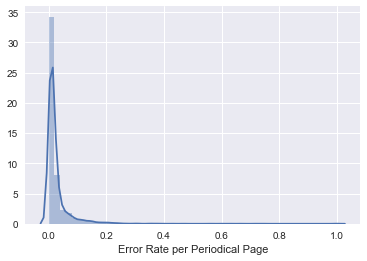

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2734),
 ('d', 2327),
 ("'", 1997),
 ('e', 1381),
 ('r', 1270),
 ('t', 1207),
 ('w', 1173),
 ('n', 1120),
 ('co', 1109),
 ('f', 796),
 ('g', 761),
 ('x', 649),
 ('lb', 583),
 ('th', 251),
 ('sel', 251),
 ('oo', 237),
 ('mo', 230),
 ('pp', 226),
 ('z', 217),
 ('k', 215),
 ('u', 199),
 ("an'", 192),
 ('q', 133),
 ('ex', 106),
 ('ournal', 106),
 ('al', 98),
 ('te', 85),
 ('oz', 81),
 ('ro', 80),
 ('ga', 80),
 ('pa', 74),
 ('va', 74),
 ('munn', 73),
 ('io', 72),
 ('ti', 67),
 ('-', 66),
 ("infants'", 61),
 ('id', 58),
 ('zo', 55),
 ('viperance', 54),
 ('em', 53),
 ('tion', 51),
 ("''", 49),
 ('re', 48),
 ('urnal', 48),
 ('si', 47),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44),
 ('cloe', 43)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18850601-V01-01-page1.txt: [('in', 'toxicating'), ('TEMPER', 'ANCE')]
PHJ18850601-V01-01-page16.txt: [('PHYSIC', 'AL'), ('state', 'ment')]
PHJ18850601-V01-01-page21.txt: [('o', 'pp')]
PHJ18850601-V01-01-page24.txt: [('A', 'ZAL'), ('A', 'li')]
PHJ18850801-V01-02-page1.txt: [('F', 'lt')]
PHJ18850801-V01-02-page22.txt: [('o', 'pp')]
PHJ18850801-V01-02-page4.txt: [('f', 'und')]
PHJ18850801-V01-02-page8.txt: [('Q', 'uick'), ('U', 'se'), ('J', 'ust'), ('R', 'emember'), ('K', 'eep'), ('T', 'ake'), ('N', 'ow'), ('P', 'eople'), ('Z', 'eal'), ('C', 'hildren'), ('G', 'arments'), ('M', 'uch'), ('H', 'omes'), ('S', 'ee'), ('X', 'erxes'), ('F', 'reshen'), ('V', 'ery')]
PHJ18851001-V01-03-page13.txt: [('A', 'ccount')]
PHJ18851001-V01-03-page22.txt: [('num', 'ber'), ('o', 'pp')]
PHJ18851001-V01-03-page23.txt: [('K', 'Ra')]
PHJ18851001-V01-03-page5.txt: [('r', 'oo')]
PHJ18851201-V01-04-page21.txt: [('JOUR', 'NAL')]
PHJ18851201-V01-04-page22.txt: [('o', 'pp')]
PHJ18860201-V01-05-page14.txt: [('physic

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction7

Average verified rate: 0.9812578035460998

Average of error rates: 0.02651921795156632

Total token count: 2849666



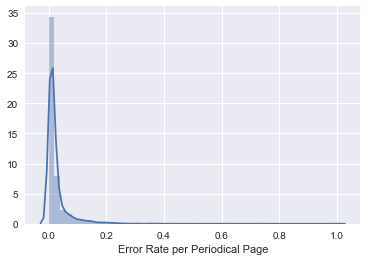

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2724),
 ('d', 2324),
 ("'", 1997),
 ('e', 1380),
 ('r', 1248),
 ('t', 1203),
 ('w', 1166),
 ('n', 1118),
 ('co', 1109),
 ('f', 795),
 ('g', 759),
 ('x', 648),
 ('lb', 583),
 ('sel', 251),
 ('th', 250),
 ('mo', 230),
 ('oo', 222),
 ('pp', 218),
 ('z', 215),
 ('k', 214),
 ('u', 196),
 ("an'", 192),
 ('q', 132),
 ('ex', 106),
 ('ournal', 105),
 ('al', 94),
 ('te', 85),
 ('oz', 81),
 ('ga', 80),
 ('ro', 77),
 ('pa', 74),
 ('va', 74),
 ('munn', 73),
 ('io', 72),
 ('-', 66),
 ('ti', 66),
 ("infants'", 61),
 ('id', 55),
 ('viperance', 54),
 ('zo', 53),
 ('em', 53),
 ('tion', 51),
 ("''", 49),
 ('si', 47),
 ('urnal', 47),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44),
 ('cloe', 43),
 ('tt', 42)]

## Review Remaining Errors

In [34]:
GoH.reports.docs_with_high_error_rate(summary)

[('PHJ19030301-V18-03-page4.txt', 1.0),
 ('PHJ19030201-V18-02-page4.txt', 1.0),
 ('PHJ19030501-V18-05-page4.txt', 0.744),
 ('PHJ19030401-V18-04-page35.txt', 0.719),
 ('PHJ19040201-V19-02-page4.txt', 0.667),
 ('PHJ19030901-V18-09-page4.txt', 0.632),
 ('PHJ19021201-V17-12-page4.txt', 0.6),
 ('PHJ19030101-V18-01-page35.txt', 0.556),
 ('PHJ18870801-V02-08-page1.txt', 0.468),
 ('PHJ19011201-V16-12-page4.txt', 0.429),
 ('PHJ19011201-V16-12-page3.txt', 0.388),
 ('PHJ18870201-V02-05-page1.txt', 0.376),
 ('PHJ19010201-V16-02-page33.txt', 0.375),
 ('PHJ18870401-V02-06-page1.txt', 0.355),
 ('PHJ18860801-V02-02-page1.txt', 0.354),
 ('PHJ18861201-V02-04-page1.txt', 0.35),
 ('PHJ19010701-V16-07-page13.txt', 0.311),
 ('PHJ18871001-V02-09-page1.txt', 0.309),
 ('PHJ18870601-V02-07-page1.txt', 0.308),
 ('PHJ18861001-V02-03-page1.txt', 0.297),
 ('PHJ19031201-V18-12-page35.txt', 0.274),
 ('PHJ19011001-V16-10-page33.txt', 0.267),
 ('PHJ19021101-V17-11-page36.txt', 0.264),
 ('PHJ19011201-V16-12-page2.txt', 

In [35]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.4]

GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

PHJ19030301-V18-03-page4.txt

PHJ19030201-V18-02-page4.txt

PHJ19030501-V18-05-page4.txt

PHJ19030401-V18-04-page35.txt

PHJ19040201-V19-02-page4.txt

PHJ19030901-V18-09-page4.txt

PHJ19021201-V17-12-page4.txt

PHJ19030101-V18-01-page35.txt

PHJ18870801-V02-08-page1.txt

PHJ19011201-V16-12-page4.txt



Mostly image pages.

In [36]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['sanitaryshnitary',
  "english'temperance",
  'restaurant-stand',
  'wefurnishpatternsforhigh',
  'acccoommodations',
  'good-for-nothing',
  'iiiiietaiiawrialauumnamumaymmo',
  'queen-of-the-queens',
  'gradual-reduction-process',
  'itchialrractaerned',
  'three-sixteenths',
  'artificially-fed',
  'three-hundredths',
  'gilmniiiimmiumffinum',
  'whisky-drunkards',
  'perfectly-constructed',
  'gently-stimulating',
  'divinely-appointed',
  "paid'advertisements",
  'mnuamanenummonami',
  'non-crystallizable',
  'mminiminnecatalogue',
  'supersensitiveness',
  'originallyjnvestigated',
  'household-helpers',
  'aermotorwindmills',
  "thesd'habitliabits",
  'rosy-complexioned',
  'sanitariumsanitarium',
  'health-promoting',
  'deudnsidtnaigntges',
  'public-spiritedness',
  'advertielderitiderb',
  'unconditionaltly',
  'pleasure-seekers',
  'not-afraid-of-the-rain',
  'accomplishmentwhichhascomevery',
  'self-preservation',
  'heaven-appointed',
  'over-consumption',
  'avoiddanaro

## Correction 8 -- Remove long tokens

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "n|N"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "f|F"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "t|T"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "l|L"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18851201-V01-04-page24.txt: [('IIIIfIfIIIIIIIIII', ' ')]
PHJ18860801-V02-02-page1.txt: [('soNntNncvccocNnNosc.m.tv.c.tnNxcvccw', ' '), ('NNNtvvioNnIccNnNwkwx', ' ')]
PHJ18870601-V02-07-page1.txt: [('N.NNILNNILNNN.', ' ')]
PHJ18881101-V03-11-page27.txt: [('nnonoranniNgrinnuncarannonciationcimannoroarancinempzinntn', ' ')]
PHJ18890501-V04-05-page24.txt: [('Itithnffiffiefinfficiently', ' ')]
PHJ18900801-V05-08-page32.txt: [('WIFFINWOWHIIIIIWIFFEFFITIVIL', ' ')]
PHJ18920701-V07-07-page23.txt: [('mitimiiiiiiiiiiimmitutimmiticium', ' ')]
PHJ18921101-V07-11-page22.txt: [('Millillitilill', ' ')]
PHJ19010301-V16-03-page30.txt: [('ttitttttttttittitt', ' ')]
PHJ19010401-V16-04-page30.txt: [('IMIMMOSUMMWORANICVNIMMAIXIIMICil', ' ')]
PHJ19010501-V16-05-page35.txt: [('iiiiIIIIIIIII', ' ')]
PHJ19010901-V16-09-page33.txt: [('MIUMMIINIIMIMMORMIlleiriMMUNIPM', ' '), ('LttlitlYAMtkilletaitaillitialaailkill.failk', ' ')]
PHJ19030901-V18-09-page2.txt: [('mmtvmszKommommeszmmtimmotmectoot', ' ')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction8

Average verified rate: 0.9812646838465844

Average of error rates: 0.026498778049322377

Total token count: 2849645



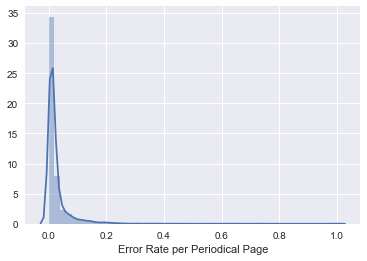

In [38]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2723),
 ('d', 2324),
 ("'", 1997),
 ('e', 1380),
 ('r', 1248),
 ('t', 1203),
 ('w', 1166),
 ('n', 1117),
 ('co', 1109),
 ('f', 795),
 ('g', 759),
 ('x', 648),
 ('lb', 583),
 ('sel', 251),
 ('th', 250),
 ('mo', 230),
 ('oo', 222),
 ('pp', 218),
 ('z', 215),
 ('k', 214),
 ('u', 196),
 ("an'", 192),
 ('q', 132),
 ('ex', 106),
 ('ournal', 105),
 ('al', 94),
 ('te', 85),
 ('oz', 81),
 ('ga', 80),
 ('ro', 77),
 ('pa', 74),
 ('va', 74),
 ('munn', 73),
 ('io', 72),
 ('-', 66),
 ('ti', 66),
 ("infants'", 61),
 ('id', 55),
 ('viperance', 54),
 ('zo', 53),
 ('em', 53),
 ('tion', 51),
 ("''", 49),
 ('si', 47),
 ('urnal', 47),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44),
 ('cloe', 43),
 ('tt', 42)]

## Correction 9 -- Separate Squashed Words

In [41]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = "correction8"
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PHJ18860801-V02-02-page21.txt: [('painkillezejkillers', 'p a ink i l le z e j k i l l e r s')]
PHJ18860801-V02-02-page25.txt: [('localititecalities', 'local it it e c a l i t i e s')]
PHJ18860801-V02-02-page4.txt: [('immediatelyremoved', 'immediately removed')]
PHJ18870401-V02-06-page24.txt: [('brownsugarinwhichahalfteaspoonpulverized', 'brown sugar in which a half teaspoon pulverized')]
PHJ18870401-V02-06-page28.txt: [('DURINGTHECHRISTIAN', 'DURING THE CHRISTIAN')]
PHJ18870801-V02-08-page29.txt: [('PACIFICPRESSPUBLISHINGROUSEOaldgildCal', 'PACIFIC PRESS PUBLISHING R O U S E O a l d g i l d C a l')]
PHJ18870801-V02-08-page30.txt: [('householddictionary', 'household dictionary')]
PHJ18871001-V02-09-page25.txt: [('precedingpreparations', 'preceding preparations')]
PHJ18880301-V03-03-page26.txt: [('informationladdress', 'information lad dress')]
PHJ18881101-V03-11-page27.txt: [('EECLICEIZLIECOUIZIEIFICINCIIMIC', 'E E C L I C E I Z L I E C O U I Z I E I F I C I N C I I M I C')]
PHJ18890201

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PHJ/correction9

Average verified rate: 0.9812348137373975

Average of error rates: 0.026514996667407243

Total token count: 2850438



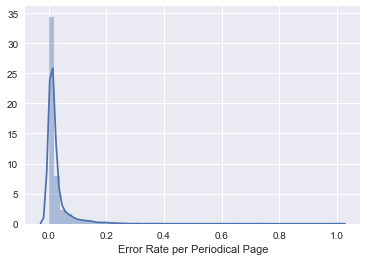

In [42]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 2741),
 ('d', 2338),
 ("'", 1997),
 ('e', 1411),
 ('r', 1272),
 ('t', 1245),
 ('w', 1172),
 ('n', 1131),
 ('co', 1109),
 ('f', 805),
 ('g', 769),
 ('x', 649),
 ('lb', 583),
 ('sel', 251),
 ('th', 250),
 ('mo', 230),
 ('z', 222),
 ('oo', 222),
 ('k', 221),
 ('pp', 218),
 ('u', 207),
 ("an'", 192),
 ('q', 132),
 ('ex', 106),
 ('ournal', 105),
 ('al', 94),
 ('te', 85),
 ('oz', 81),
 ('ga', 80),
 ('ro', 77),
 ('pa', 74),
 ('va', 74),
 ('munn', 73),
 ('io', 72),
 ('-', 66),
 ('ti', 66),
 ("infants'", 61),
 ('id', 55),
 ('viperance', 54),
 ('zo', 53),
 ('em', 53),
 ('tion', 51),
 ("''", 49),
 ('si', 47),
 ('urnal', 47),
 ('fahr', 46),
 ('cc', 45),
 ("hours'", 44),
 ('cloe', 43),
 ('tt', 42)]